In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


#Exploratory Data Analysis (EDA)

##Visualization

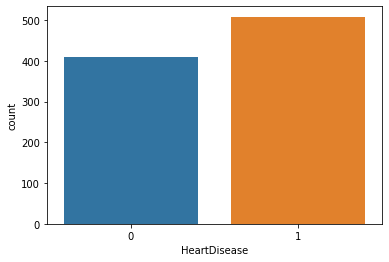

In [ ]:
#grouping by a specific column
df.groupby(['HeartDisease']).count()
#visualization
import seaborn as sns
sns.countplot(x = 'HeartDisease', data = df)
import matplotlib.pyplot as plt 

In [ ]:
# First, import helpful Python tools for loading/navigating data
import os             # Good for navigating your computer's files 
import numpy as np    # Great for lists (arrays) of numbers
import pandas as pd   # Great for tables (google spreadsheets, microsoft excel, csv)
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score   # Great for creating quick ML models
from sklearn.preprocessing import scale

Text(0.5, 1.0, 'Age Distribution')

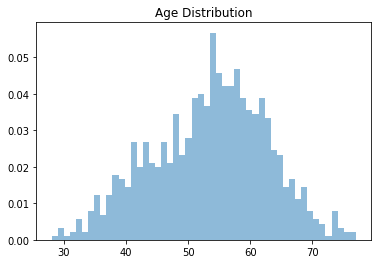

In [ ]:
plt.hist(df.Age, bins=50, density=1, alpha=0.5)
plt.title('Age Distribution')

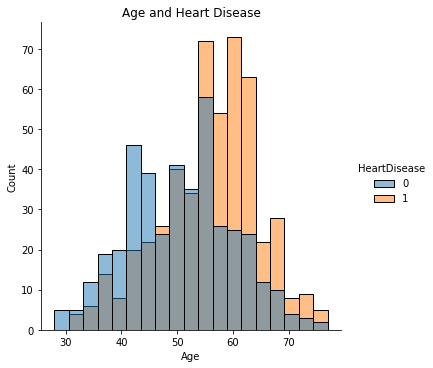

In [ ]:
sns.displot(df, x="Age", hue = 'HeartDisease')
plt.title('Age and Heart Disease')
plt.show()

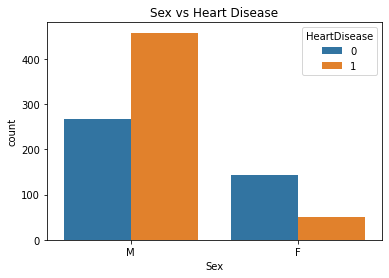

In [ ]:
sns.countplot(x="Sex", hue = 'HeartDisease', data = df)
plt.title('Sex vs Heart Disease')
plt.show()

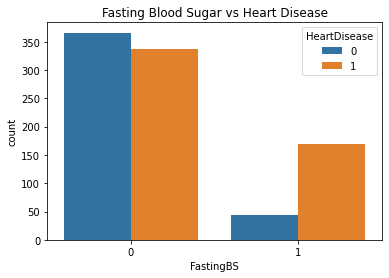

In [ ]:
sns.countplot(x="FastingBS", hue = 'HeartDisease', data = df)
plt.title('Fasting Blood Sugar vs Heart Disease')
plt.show()

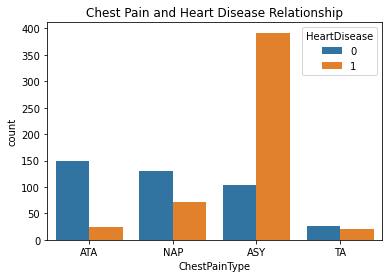

In [ ]:
sns.countplot(x="ChestPainType", hue = 'HeartDisease', data = df)
plt.title('Chest Pain and Heart Disease Relationship')
plt.show()

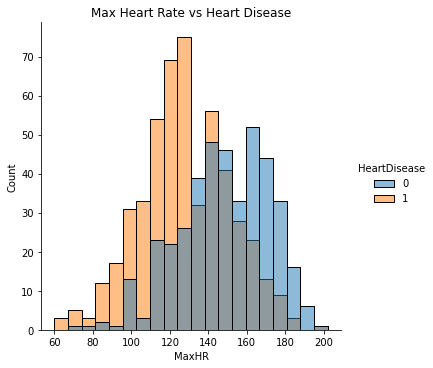

In [ ]:
sns.displot(df, x="MaxHR", hue = 'HeartDisease')
plt.title('Max Heart Rate vs Heart Disease')
plt.show()

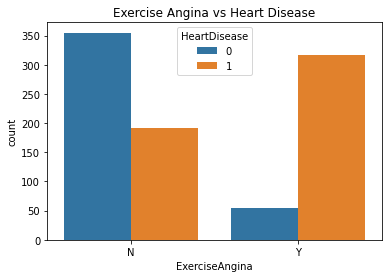

In [ ]:
sns.countplot(x="ExerciseAngina", hue = 'HeartDisease', data = df)
plt.title('Exercise Angina vs Heart Disease')
plt.show()

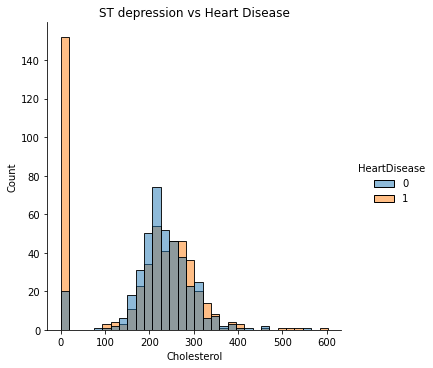

In [ ]:
sns.displot(df, x="Cholesterol", hue = 'HeartDisease')
plt.title('ST depression vs Heart Disease')
plt.show()

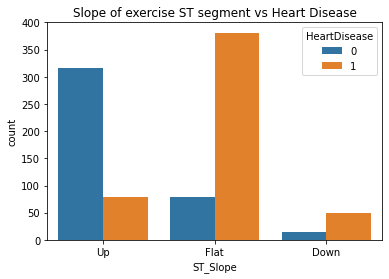

In [ ]:
sns.countplot( x="ST_Slope", hue = 'HeartDisease', data=df)
plt.title('Slope of exercise ST segment vs Heart Disease')
plt.show()

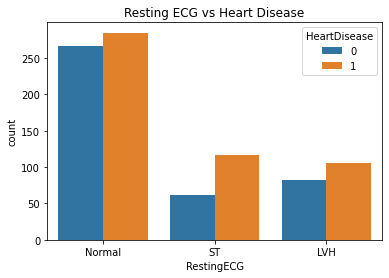

In [ ]:
sns.countplot( x="RestingECG", hue = 'HeartDisease', data=df)
plt.title('Resting ECG vs Heart Disease')
plt.show()
#Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV),
# LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria

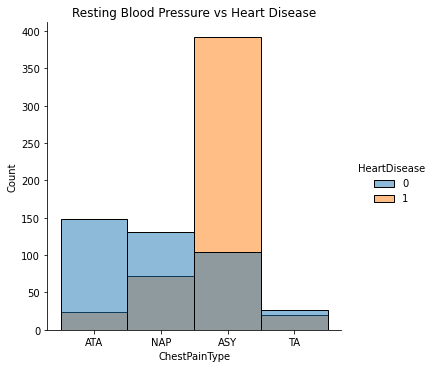

In [ ]:
sns.displot(df, x="ChestPainType", hue = 'HeartDisease')
plt.title('Resting Blood Pressure vs Heart Disease')
plt.show()

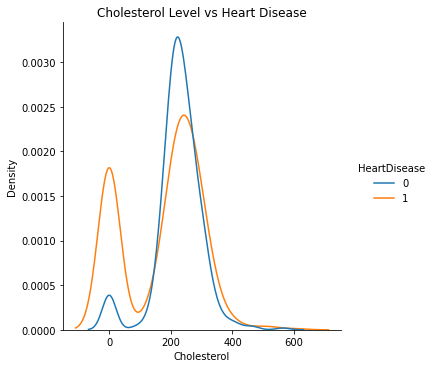

In [ ]:
sns.displot(df, x="Cholesterol", hue='HeartDisease', kind = 'kde' )
plt.title('Cholesterol Level vs Heart Disease')
plt.show()

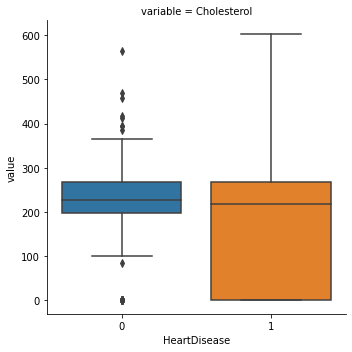

In [ ]:
df_ = pd.melt(df[[ 'Cholesterol', 'HeartDisease',]], id_vars='HeartDisease')
# display box plots to show the feature distribution by Heart Disease status
g = sns.catplot(x='HeartDisease', y='value', col='variable', data=df_, kind='box')

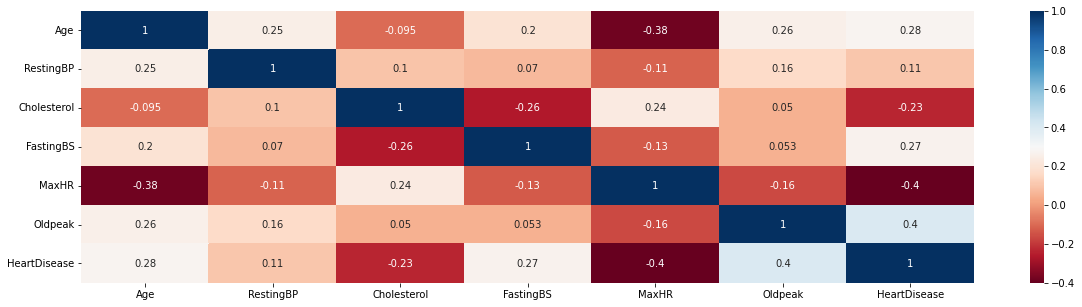

In [ ]:
plt.figure(figsize = (20,5))
sns.heatmap(df.corr(),cmap = 'RdBu',annot = True);

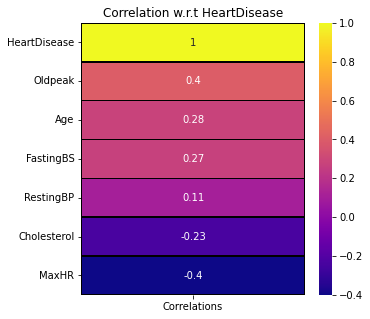

In [ ]:
corr = df.corrwith(df['HeartDisease']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = 'plasma',linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t HeartDisease');

##Data Pre-processing

remove missing data

In [ ]:
df = df.dropna()

remove potential outliers

In [ ]:
# IQR based filtering
#REMOVING RESTING BP OUTLIERS
Q1 = np.percentile(df['RestingBP'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['RestingBP'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['RestingBP'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['RestingBP'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

Old Shape:  (918, 12)
New Shape:  (876, 12)


In [ ]:
# REMOVING MAX HR OUTLIERS
Q1 = np.percentile(df['MaxHR'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['MaxHR'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['MaxHR'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['MaxHR'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

Old Shape:  (876, 12)
New Shape:  (874, 12)


In [ ]:
# REMOVING CHOLESTEROL OUTLIERS
print("Highest allowed",df['Cholesterol'].mean() + 3*df['Cholesterol'].std())
print("Lowest allowed",df['Cholesterol'].mean() - 3*df['Cholesterol'].std())
df[(df['Cholesterol'] > 2.98) | (df['Cholesterol'] < -2.98)]

Highest allowed 524.388412208385
Lowest allowed -126.18932754019283


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
new_df = df[(df['Cholesterol'] < 2.98) & (df['Cholesterol'] > -2.98)]
new_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [ ]:
upper_limit = df['Cholesterol'].mean() + 3*df['Cholesterol'].std()
lower_limit = df['Cholesterol'].mean() - 3*df['Cholesterol'].std()
# 3 std deviations

In [ ]:
df['Cholesterol'] = np.where(
    df['Cholesterol']>upper_limit,
    upper_limit,
    np.where(
        df['Cholesterol']<lower_limit,
        lower_limit,
        df['Cholesterol']
    )
)

In [ ]:
df['Cholesterol'].describe()

count    874.000000
mean     198.958999
std      107.965383
min        0.000000
25%      174.250000
50%      222.000000
75%      266.000000
max      524.388412
Name: Cholesterol, dtype: float64

In [ ]:
# REMOVING OLDPEAK OUTLIERS
print("Highest allowed",df['Oldpeak'].mean() + 3*df['Oldpeak'].std())
print("Lowest allowed",df['Oldpeak'].mean() - 3*df['Oldpeak'].std())
df[(df['Oldpeak'] > 2.95) | (df['Oldpeak'] < -2.98)]

Highest allowed 4.039043079461788
Lowest allowed -2.2957936515441673


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
19,36,M,ATA,120,267.0,0,Normal,160,N,3.0,Flat,1
23,44,M,ATA,150,288.0,0,Normal,150,Y,3.0,Flat,1
26,53,M,ASY,124,260.0,0,ST,112,Y,3.0,Flat,0
68,52,M,ASY,160,246.0,0,ST,82,Y,4.0,Flat,1
111,57,M,ASY,150,255.0,0,Normal,92,Y,3.0,Flat,1
142,47,M,ASY,160,291.0,0,ST,158,Y,3.0,Flat,1
155,56,M,ASY,155,342.0,1,Normal,150,Y,3.0,Flat,1
166,50,M,ASY,140,231.0,0,ST,140,Y,5.0,Flat,1
236,41,M,ASY,120,336.0,0,Normal,118,Y,3.0,Flat,1
239,48,M,ASY,160,193.0,0,Normal,102,Y,3.0,Flat,1


In [ ]:
new_df = df[(df['Oldpeak'] < 2.95) & (df['Oldpeak'] > -2.98)]
new_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,F,ASY,140,241.0,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264.0,0,Normal,132,N,1.2,Flat,1
915,57,M,ASY,130,131.0,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236.0,0,LVH,174,N,0.0,Flat,1


In [ ]:
upper_limit = df['Oldpeak'].mean() + 3*df['Oldpeak'].std()
lower_limit = df['Oldpeak'].mean() - 3*df['Oldpeak'].std()

In [ ]:
df['Oldpeak'] = np.where(
    df['Oldpeak']>upper_limit,
    upper_limit,
    np.where(
        df['Oldpeak']<lower_limit,
        lower_limit,
        df['Oldpeak']
    )
)

In [ ]:
df['Oldpeak'].describe()

count    874.000000
mean       0.866018
std        1.032103
min       -2.295794
25%        0.000000
50%        0.500000
75%        1.500000
max        4.039043
Name: Oldpeak, dtype: float64

Converting Categorical Features Into Numerical Values

In [ ]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
for c in ['Sex', 'ChestPainType','RestingECG', 'ExerciseAngina', 'ST_Slope']:
  le.fit(df[c])
  df[c] = le.fit_transform(df[c])
# printing label
#label
#df.drop("RestingECG", axis=1, inplace=True)
 
# Appending the array to our dataFrame
# with column name 'Purchased'
#df["RestingECG"] = label
 
  le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
  le_name_mapping

In [ ]:
# printing Dataframe
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


#Data Manipulation


standardizing features

In [ ]:
FEATURES = ['Age', 'RestingBP', 'Cholesterol','FastingBS', 'MaxHR', 'Oldpeak']
RESPONSE = 'HeartDisease'
df.loc[:, FEATURES] = scale(df.loc[:, FEATURES]) # standardizing indicators
# uniform units

splitting data data into 80% training 20% testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, FEATURES], df.loc[:, RESPONSE], test_size=0.2, random_state=0)

feature importance

Text(0.5, 0, 'Relative Importance')

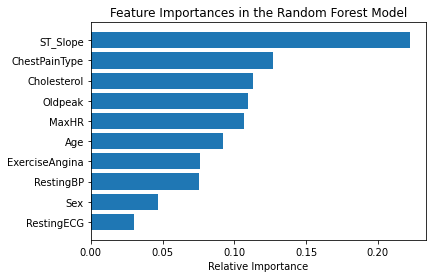

In [ ]:
from sklearn.ensemble import RandomForestClassifier # importing the random forest module

rf_model = RandomForestClassifier(random_state=0) # define the random forest model

rf_model.fit(X_train, y_train) # fit the random forest model

importances = rf_model.feature_importances_ # get importance

indices = np.argsort(importances) # sort the features' index by their importance scores

# Ranking features by thier relative importance scores.
plt.title('Feature Importances in the Random Forest Model')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [FEATURES[i] for i in indices])
plt.xlabel('Relative Importance')

In [ ]:
df=df.drop(columns=['FastingBS'])             #imp lower than 0.05
df=df.drop(columns=[ 'Sex', 'RestingECG'])

In [ ]:
df

,Age,ChestPainType,RestingBP,Cholesterol,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1,0.410909,0.825070,1.382928,0,-0.832432,2,0
1,-0.478484,2,1.491752,-0.171961,0.754157,0,0.105664,1,1
2,-1.751359,1,-0.129513,0.770188,-1.525138,0,-0.832432,2,0
3,-0.584556,0,0.302825,0.139040,-1.132156,1,0.574711,1,1
4,0.051881,2,0.951331,-0.034755,-0.581981,0,-0.832432,2,0
...,...,...,...,...,...,...,...,...,...
913,-0.902775,3,-1.210356,0.596393,-0.188999,0,0.293283,1,1
914,1.536902,0,0.627078,-0.053049,0.164684,0,2.357094,1,1
915,0.370100,0,-0.129513,-0.620168,-0.857069,1,0.293283,1,1
916,0.370100,1,-0.129513,0.340275,1.461525,0,-0.832432,1,1


In [ ]:
df.columns[:-1]

Index(['Age', 'ChestPainType', 'RestingBP', 'Cholesterol', 'MaxHR',
       'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')

In [ ]:
FEATURES=df.columns[:-1]
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, FEATURES], df.loc[:, RESPONSE], test_size=0.2, random_state=0)

In [ ]:
y_train

378    1
356    1
738    0
85     1
427    1
      ..
835    1
192    0
629    0
559    1
684    1
Name: HeartDisease, Length: 734, dtype: int64

In [ ]:
X_train

,Age,ChestPainType,RestingBP,Cholesterol,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
378,1.749048,0,0.410909,-1.818435,0.793455,1,1.043759,1
356,-0.796702,0,-0.940145,-1.818435,-0.935665,1,0.574711,1
738,1.218683,2,1.491752,1.474513,0.557666,0,-0.081956,2
85,1.324756,0,0.410909,-0.546991,-1.682331,1,0.105664,1
427,0.582246,0,0.410909,-1.818435,-0.778472,1,0.105664,1
...,...,...,...,...,...,...,...,...
835,0.051881,0,-1.210356,0.367716,-0.424789,1,1.794236,1
192,-0.584556,1,-0.129513,0.422599,0.911350,0,-0.832432,2
629,0.370100,0,-0.237597,0.953129,0.872052,0,-0.832432,2
559,1.112610,0,0.086656,0.678717,-1.367945,1,2.919951,0


 remove multicollinearity

No features with correlations > 0.05. ( correlation heat map)

#Modeling

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model = logistic_model.fit(X_train, y_train)
lr_probs = logistic_model.predict_proba(X_test) # calculate the probabilities of the class for the test dataset using ‘predict_proba’
y_test_pred_logistic = logistic_model.predict(X_test) # predict the class labels using predict function for the test dataset

Confusion Matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

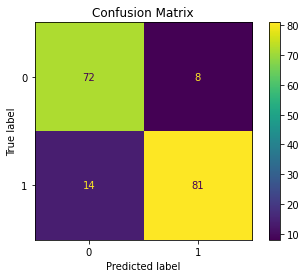

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logistic_model, X_test, y_test)
plt.title("Confusion Matrix")

Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred_logistic))
# precision = TP/(TP + FP)
# recall = TP/(TP + FN)
# F1 score = closer to 1: better accuracy
# support = no. of occurences
# macro avg = 0.5(score of class 0) + 0.5(score of class 1)
# Weighted avg = (fraction of class 0)*(score of class 0) + (fraction of class 1)*(score of class 1)  

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        80
           1       0.91      0.85      0.88        95

    accuracy                           0.87       175
   macro avg       0.87      0.88      0.87       175
weighted avg       0.88      0.87      0.87       175



Accuracy Scores

In [ ]:
print('training accuracy score:', logistic_model.score(X_train,y_train))
print('testing accuracy score:', logistic_model.score(X_test,y_test))

training accuracy score: 0.8254649499284692
testing accuracy score: 0.8742857142857143


In [ ]:
accuracy = accuracy_score(y_test, y_test_pred_logistic)
print(accuracy)

0.8742857142857143


AUC Score

In [ ]:
from sklearn.metrics import roc_auc_score
logistic_pred_test_proba = logistic_model.predict_proba(X_test)
logistic_auc_score = roc_auc_score(y_test, logistic_pred_test_proba[:,1])# 2nd column of y_test
print('Logistic Classifier: ROC AUC=%.3f' % logistic_auc_score)

Logistic Classifier: ROC AUC=0.939


KNN

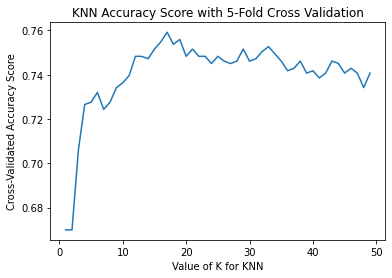

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
# Specifying the K in K-Fold CV
k_cv = 5
# choose k between 1 to 30
k_range = range(1, 50)
k_accuracy = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracy = cross_val_score(knn, df.loc[:, FEATURES], df.loc[:, RESPONSE], cv=k_cv, scoring='accuracy')
    k_accuracy.append(accuracy.mean())
    
plt.plot(k_range, k_accuracy)
plt.title('KNN Accuracy Score with '+str(k_cv)+'-Fold Cross Validation')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy Score')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 18)
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_train)
knn_probs = knn.predict_proba(X_test) 
y_test_pred_knn= knn.predict(X_test)

Confusion Matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

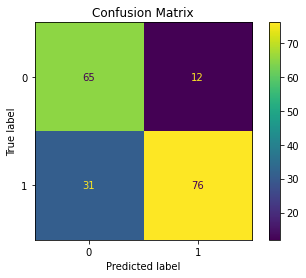

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test)
plt.title("Confusion Matrix")

Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred_knn))

              precision    recall  f1-score   support

           0       0.68      0.84      0.75        77
           1       0.86      0.71      0.78       107

    accuracy                           0.77       184
   macro avg       0.77      0.78      0.77       184
weighted avg       0.79      0.77      0.77       184



Accuracy scores

In [ ]:
print('training accuracy score:', knn.score(X_train,y_train))
print('testing accuracy score:', knn.score(X_test,y_test))

training accuracy score: 0.7929155313351499
testing accuracy score: 0.7663043478260869


In [ ]:
accuracy = accuracy_score(y_test, y_test_pred_knn)
print(accuracy)

0.7663043478260869


AUC Score

In [ ]:
from sklearn.metrics import roc_auc_score
knn_pred_test_proba = knn.predict_proba(X_test)
knn_auc_score = roc_auc_score(y_test, knn_pred_test_proba[:,1])# 2nd column of y_test
print('KNN Classifier: ROC AUC=%.3f' % knn_auc_score)

KNN Classifier: ROC AUC=0.839


Support Vector Machine (SVM)

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear', probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

Confusion Matrix


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

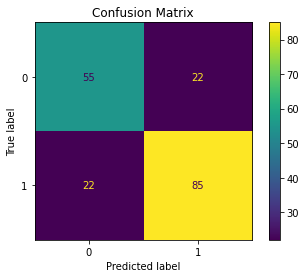

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)
plt.title("Confusion Matrix")

Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71        77
           1       0.79      0.79      0.79       107

    accuracy                           0.76       184
   macro avg       0.75      0.75      0.75       184
weighted avg       0.76      0.76      0.76       184



Accuracy scores

In [ ]:
print('training accuracy score:', clf.score(X_train,y_train))
print('testing accuracy score:', clf.score(X_test,y_test))

training accuracy score: 0.8269754768392371
testing accuracy score: 0.7608695652173914


AUC Score

In [ ]:
from sklearn.metrics import roc_auc_score
clf_pred_test_proba = clf.predict_proba(X_test)
clf_auc_score = roc_auc_score(y_test, clf_pred_test_proba[:,1])# 2nd column of y_test
print('SVM Classifier: ROC AUC=%.3f' % clf_auc_score)

KNN Classifier: ROC AUC=0.863
